# OBJECTIVE
Build a predictive model to determine which customers are likely to churn (leave the bank)

Given a set of customer record, determine the probabilities of churn for each customer

# Importing important libraries.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import drive
drive.mount('/content/drive')


MessageError: ignored

# Load the Data

In [ ]:
df=pd.read_csv('/content/DS3_C6_S2_Classification_BankChurn_Data_Project.csv')

In [ ]:
df


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Checking for null values.

In [ ]:
def cal_missing_value(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percentage=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([total,percentage], axis=1, keys=['Total','Percentage'])
    return missing_data

In [ ]:
cal_missing_value(df)

,Total,Percentage
CustomerId,0,0.0
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0
HasCrCard,0,0.0


In [ ]:
num_data=df.select_dtypes(include=np.number)
num_data

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
cat__data=df.select_dtypes(exclude=np.number)
cat__data

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [ ]:
for cols in list(num_data.columns):
  print(num_data[cols].value_counts())
  print('------------------------------')

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64
------------------------------
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
------------------------------
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
------------------------------
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
------------------------------
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: Balance, Len

In [ ]:
for cols in cat__data:
  print(cat__data[cols].value_counts())
  print('---------------------------')

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
---------------------------
France     5001
Germany    2502
Spain      2469
france        7
espanio       6
fra           6
ger           4
spain         2
germany       1
gernamy       1
GERMANY       1
Name: Geography, dtype: int64
---------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
---------------------------


# Conclusion:
Here we see that the gegoraphy columns have france ,France,fra,rows which same countries with different typo , similarly germany,gernamy,GERMANY,Germany and spain Spain ,espanio so we will change the name

In [ ]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df['Geography'] = df['Geography'].replace({'fra':'France','france':'France','ger':'Germany','germany':'Germany','gernamy':'Germany','GERMANY':'Germany','spain':'Spain','espanio':'Spain'})

In [ ]:
cat__data=df.select_dtypes(exclude=np.number)
cat__data

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [ ]:
for cols in cat__data:
  print(cat__data[cols].value_counts())
  print('---------------------------')

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
---------------------------
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
---------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
---------------------------


# Conclusion:
so replace the char in geography columns,Now we observe that is no nulls  and noise in data so will process furthe.

In [ ]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


Here we can observe that there are three categorical column in so will convert this numeric for getting correlation with target variable Excited.

In [ ]:
# Converting columns cate to numeric
for col in ['Surname', 'Geography', 'Gender']:
    df[col] = df[col].astype('category')


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Surname_encoded']=label_encoder.fit_transform(df['Surname']) 
df['Geography_encoded']=label_encoder.fit_transform(df['Geography'])
df['Gender_encoded']=label_encoder.fit_transform(df['Gender'])

In [ ]:
df 

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_encoded,Geography_encoded,Gender_encoded
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1115,0,0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1177,2,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2040,0,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,289,0,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1822,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1999,0,1
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1336,0,1
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1570,0,0
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2345,1,1


#Conclusion:
 Columns types is changed and stored in another column.

# Scaling the dataset
Before that will remove the target Exited and other feature which are not neede to be scaled  col since it has only two variable 1 and 0.

In [ ]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_encoded,Geography_encoded,Gender_encoded
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1115,0,0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1177,2,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2040,0,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,289,0,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1822,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1999,0,1
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1336,0,1
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1570,0,0
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2345,1,1


In [ ]:
df1=df.drop(columns={'CustomerId','Exited','HasCrCard','IsActiveMember'},axis=1)

In [ ]:
df1

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Surname_encoded,Geography_encoded,Gender_encoded
0,Hargrave,619,France,Female,42,2,0.00,1,101348.88,1115,0,0
1,Hill,608,Spain,Female,41,1,83807.86,1,112542.58,1177,2,0
2,Onio,502,France,Female,42,8,159660.80,3,113931.57,2040,0,0
3,Boni,699,France,Female,39,1,0.00,2,93826.63,289,0,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,79084.10,1822,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,96270.64,1999,0,1
9996,Johnstone,516,France,Male,35,10,57369.61,1,101699.77,1336,0,1
9997,Liu,709,France,Female,36,7,0.00,1,42085.58,1570,0,0
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,92888.52,2345,1,1


In [ ]:
def feature_scale(scale):
    Numerics=['int16','int32','int64','float16','float32','float64']
    new_df=df1.select_dtypes(include=Numerics)
    if scale == 'minmax':
        scaler=MinMaxScaler()
    else:
        scaler=StandardScaler()
    df_scaled= pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)
    return df_scaled

In [ ]:
scale='minmax'
scaled_df=feature_scale(scale)
scaled_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Surname_encoded,Geography_encoded,Gender_encoded
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0.380416,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.401569,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0.696008,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.098601,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0.621631,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,0.481341,0.682020,0.0,1.0
9996,0.332,0.229730,1.0,0.228657,0.000000,0.508490,0.455817,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.210390,0.535653,0.0,0.0
9998,0.844,0.324324,0.3,0.299226,0.333333,0.464429,0.800068,0.5,1.0


In [ ]:
scaled_df[['CustomerId','Exited','HasCrCard','IsActiveMember']]=df[['CustomerId','Exited','HasCrCard','IsActiveMember']]

In [ ]:
scaled_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Surname_encoded,Geography_encoded,Gender_encoded,CustomerId,Exited,HasCrCard,IsActiveMember
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0.380416,0.0,0.0,15634602,1,1,1
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.401569,1.0,0.0,15647311,0,0,1
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0.696008,0.0,0.0,15619304,1,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.098601,0.0,0.0,15701354,0,0,0
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0.621631,1.0,0.0,15737888,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,0.481341,0.682020,0.0,1.0,15606229,0,1,0
9996,0.332,0.229730,1.0,0.228657,0.000000,0.508490,0.455817,0.0,1.0,15569892,0,1,1
9997,0.718,0.243243,0.7,0.000000,0.000000,0.210390,0.535653,0.0,0.0,15584532,1,0,1
9998,0.844,0.324324,0.3,0.299226,0.333333,0.464429,0.800068,0.5,1.0,15682355,1,1,0


In [ ]:
correlation=scaled_df.corr() 

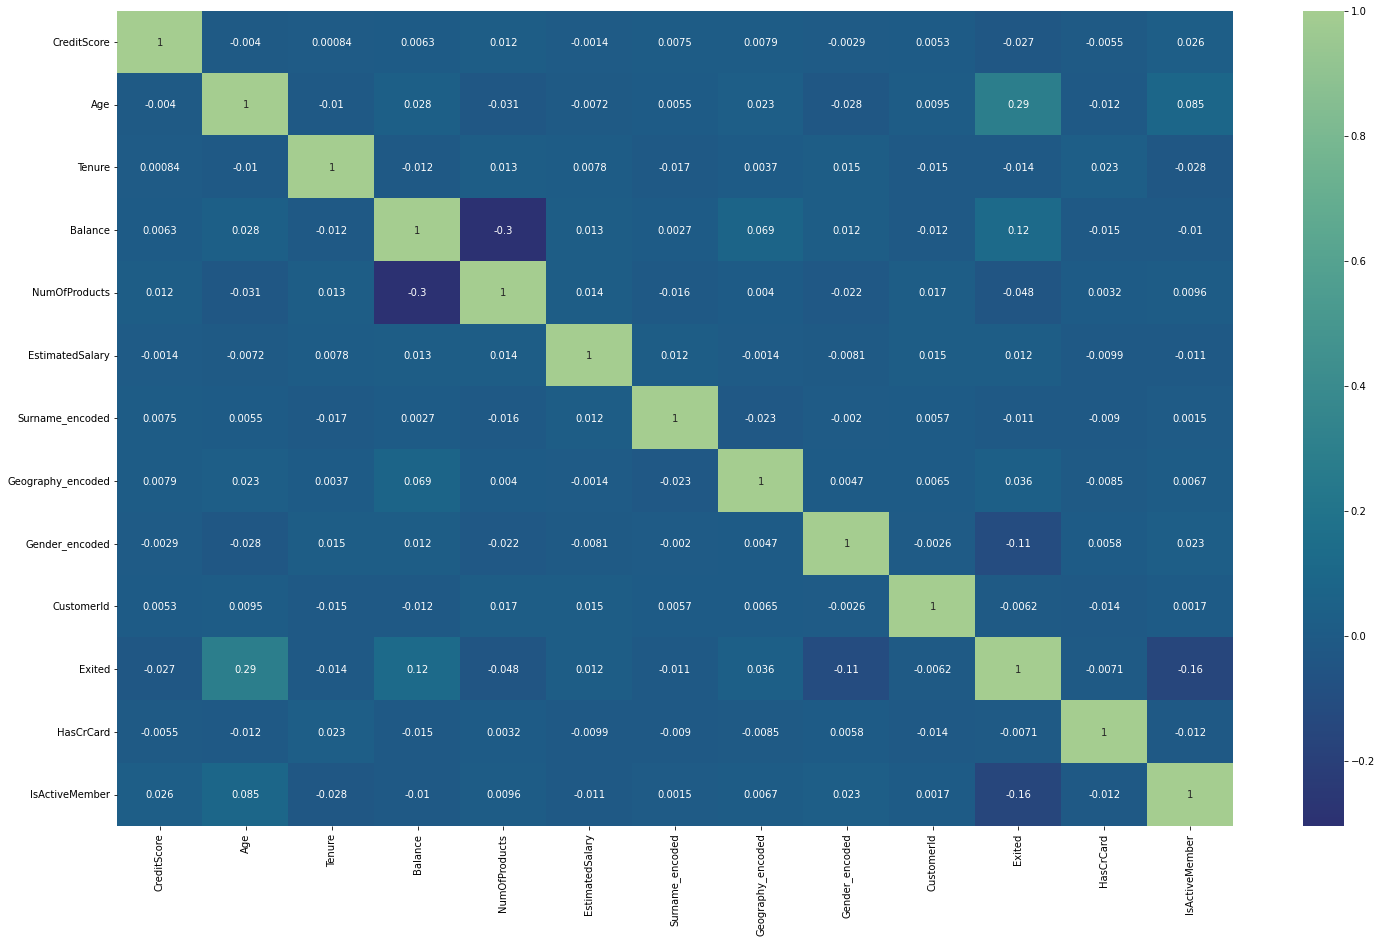

In [ ]:

plt.figure(figsize=(25,15))
sb.heatmap(data=correlation,annot=True,cmap ='crest_r')
plt.show()

# Here we can see that features like  'age','IsActiveMember','Balance' has high correlation with target variable Excited.

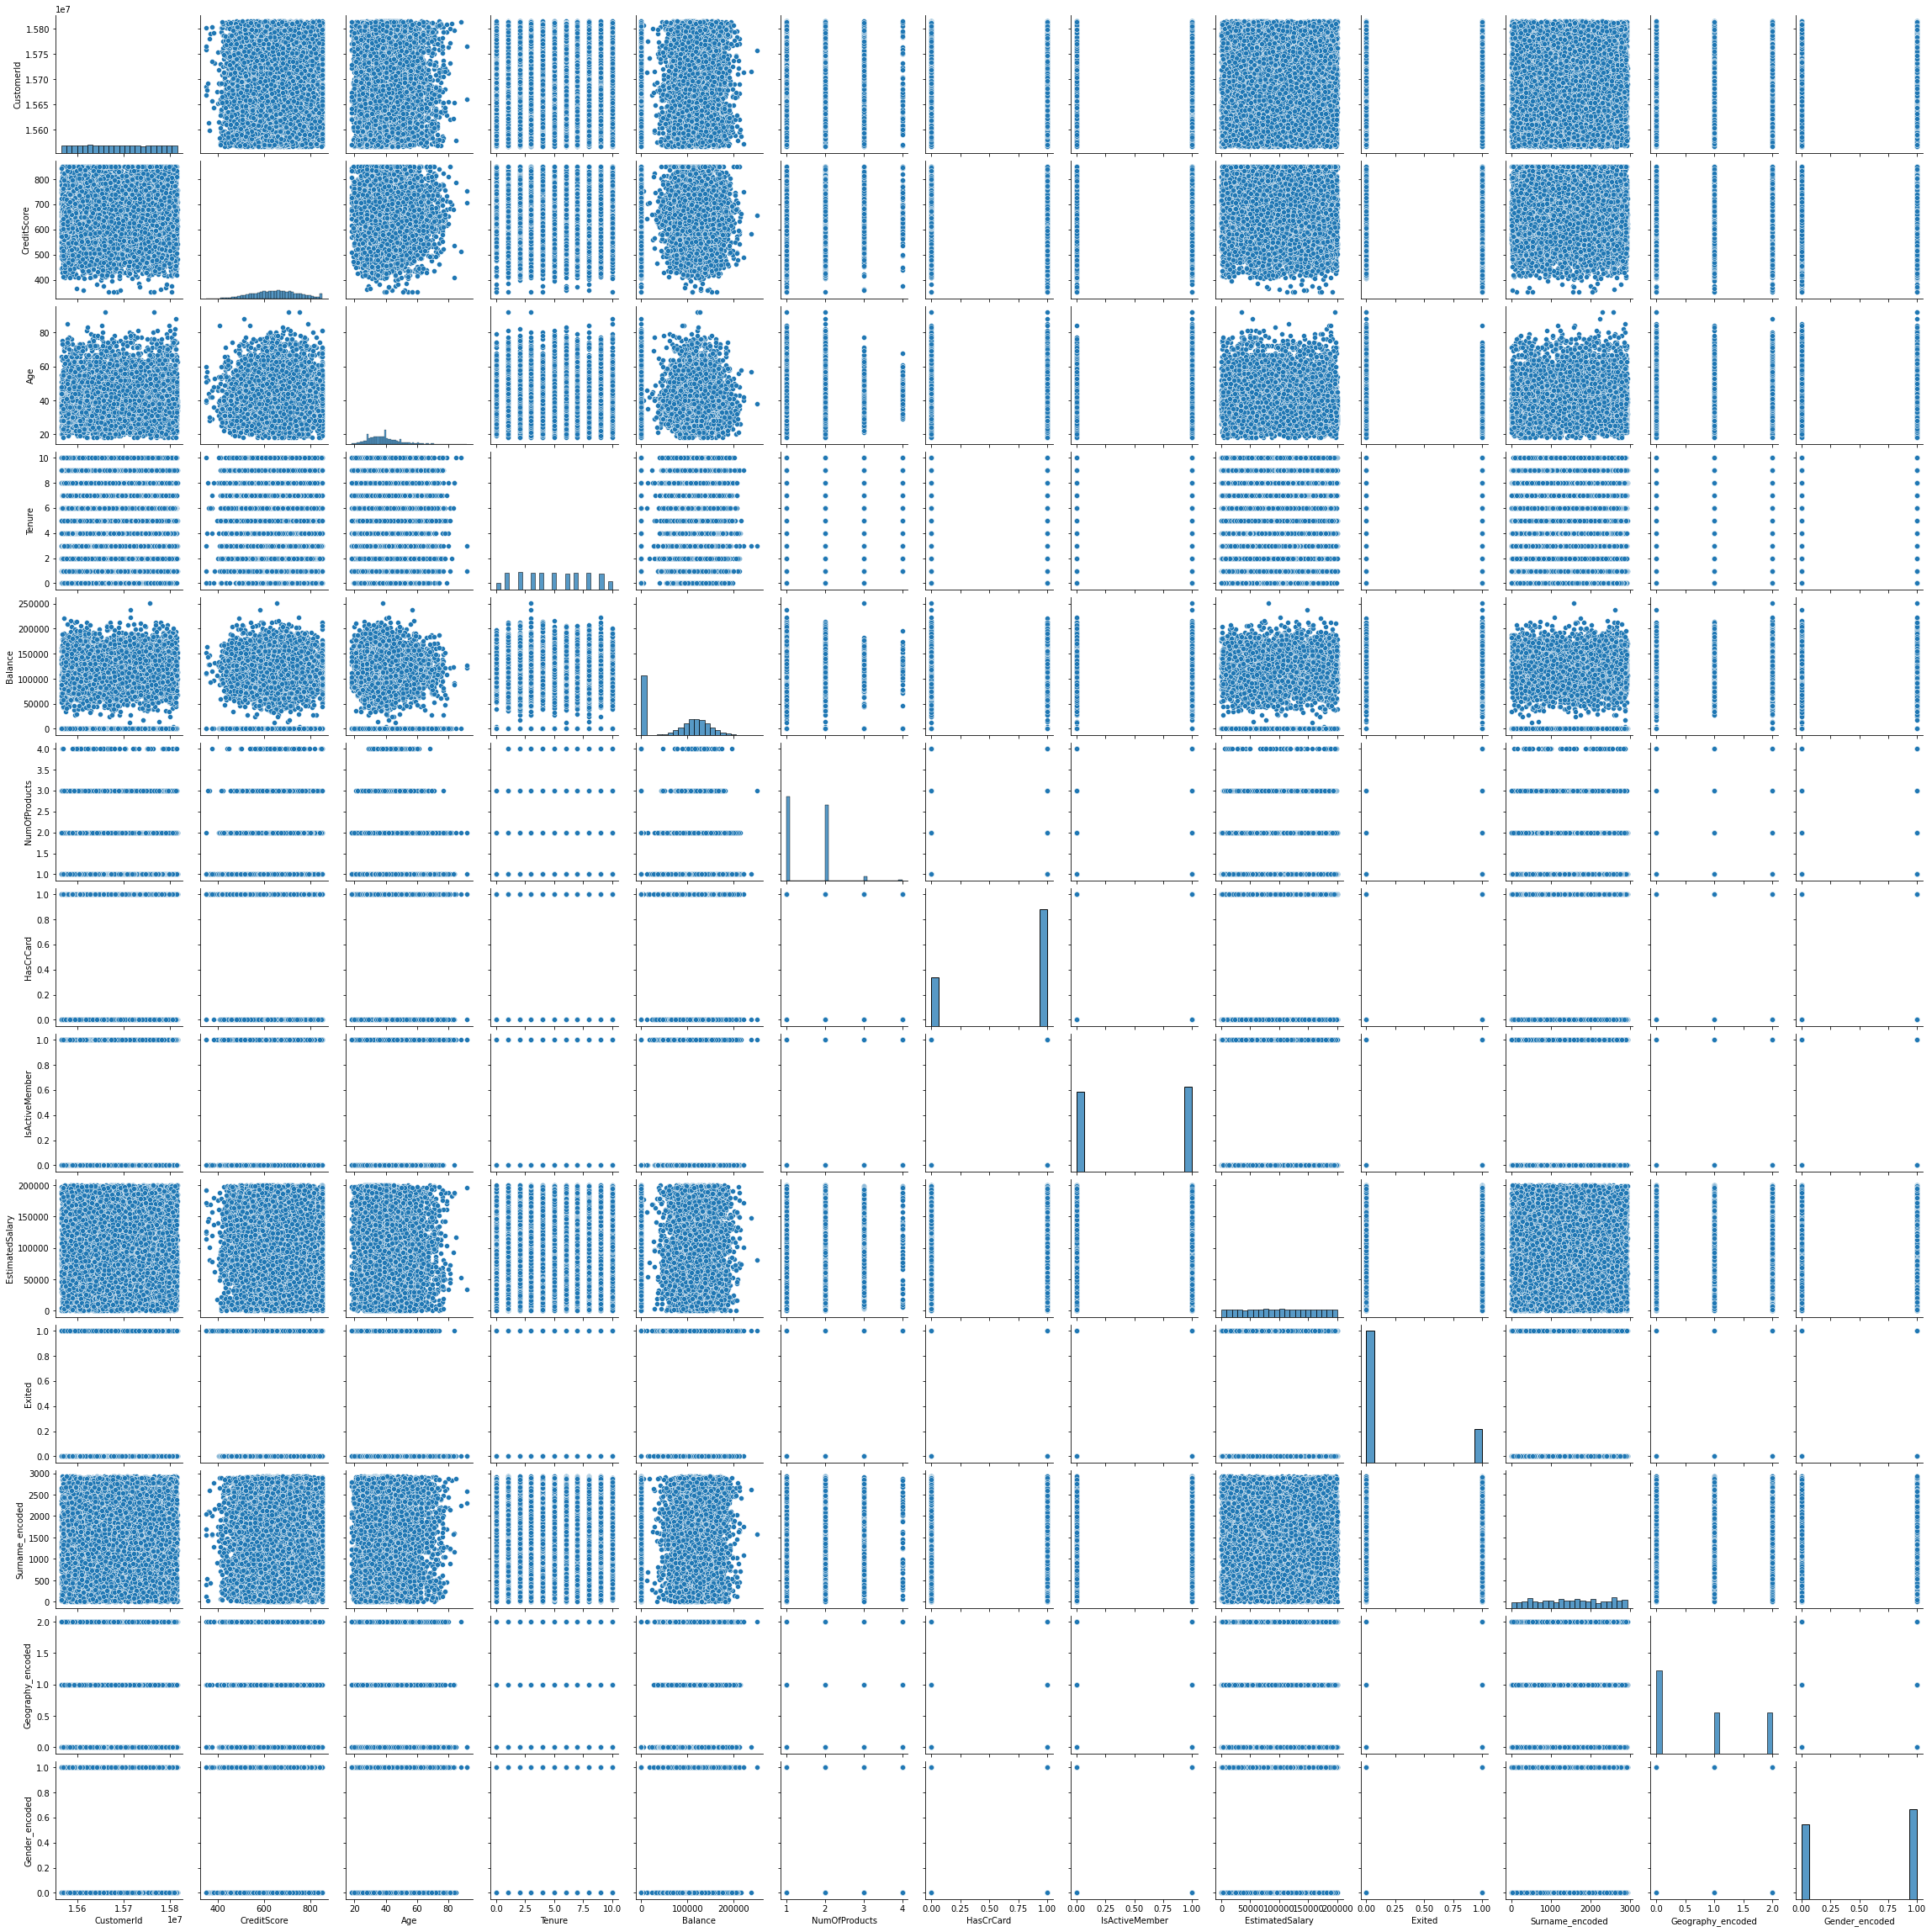

In [ ]:
sb.pairplot(df)
plt.show()

#Conclusion:
Here we can see plots between different numeric columns,but further we will do detailed analysis.

# Univariate Analysis.

In [ ]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_encoded,Geography_encoded,Gender_encoded
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1115,0,0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1177,2,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2040,0,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,289,0,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1822,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1999,0,1
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1336,0,1
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1570,0,0
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2345,1,1


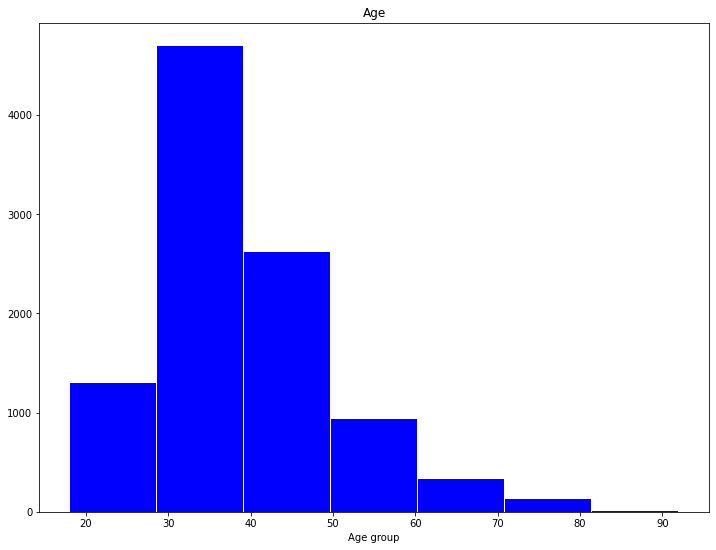

In [ ]:
plt.figure(figsize=(12,9))
plt.hist(df['Age'],bins=7,rwidth=0.99,color='b')
plt.title('Age')
plt.xlabel('Age group')
plt.show()

#Conclusion:
Here we can see that most of the people are from age group 30 to 40.

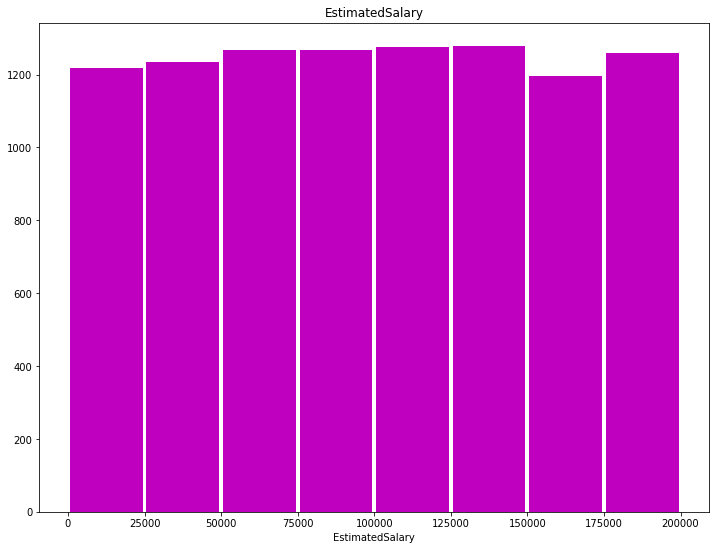

In [ ]:
plt.figure(figsize=(12,9))
plt.hist(df['EstimatedSalary'],bins=8,rwidth=0.95,color='m')
plt.title('EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.show()

# Conclusion:
Here we can see that most of the people estimated salary is between 125k to 150k.

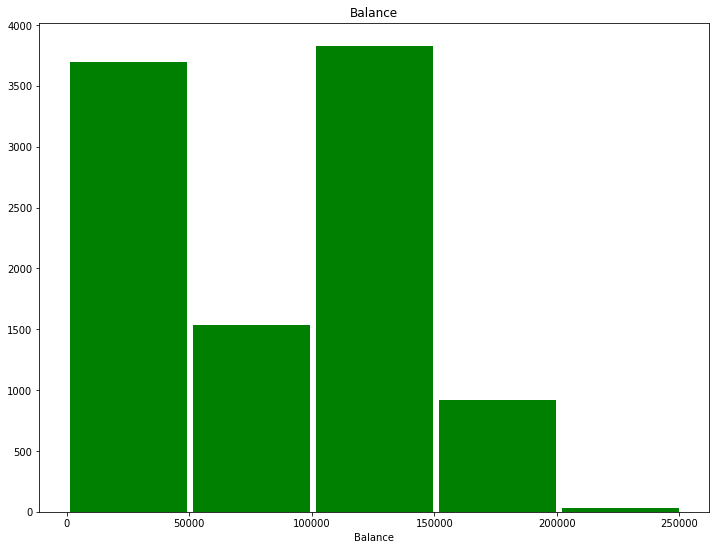

In [ ]:
plt.figure(figsize=(12,9))
plt.hist(df['Balance'],bins=5,rwidth=0.95,color='g')
plt.title('Balance')
plt.xlabel('Balance')
plt.show()

# Conclusion:
most of the customer maintain a balance between 100k to 150k.

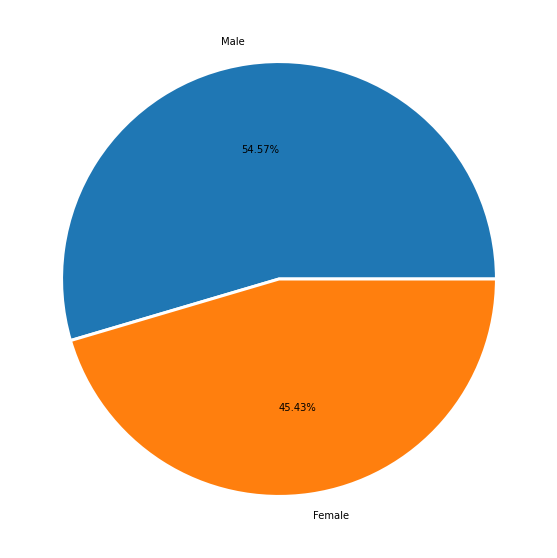

In [ ]:
plt.figure(figsize=(20,10))
A1=df["Gender"].value_counts()
B1=list(df["Gender"].value_counts().index)
plt.pie(A1,labels=B1,autopct='%.2f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' } )
plt.show()

# Conclusion:
There are more number male compared to female.

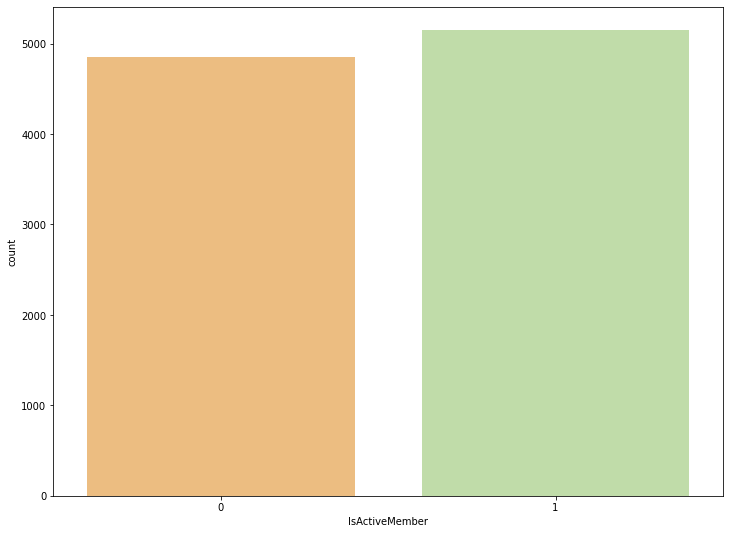

In [ ]:
plt.figure(figsize=(12,9))
sb.countplot(df['IsActiveMember'],palette='Spectral')
plt.show()

# Conclusion:
There are more number are more then 5000 active members who use bank product.

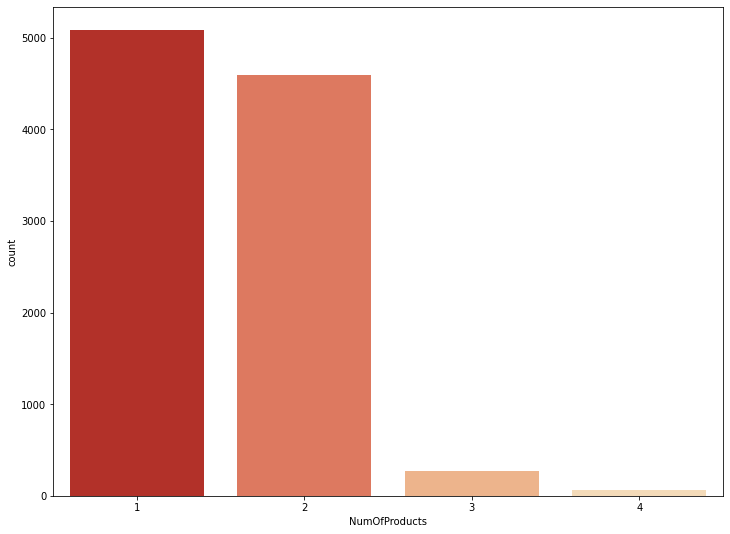

In [ ]:
plt.figure(figsize=(12,9))
sb.countplot(df['NumOfProducts'],palette='OrRd_r')
plt.show()

# Most of the member are active use 1 bank product.

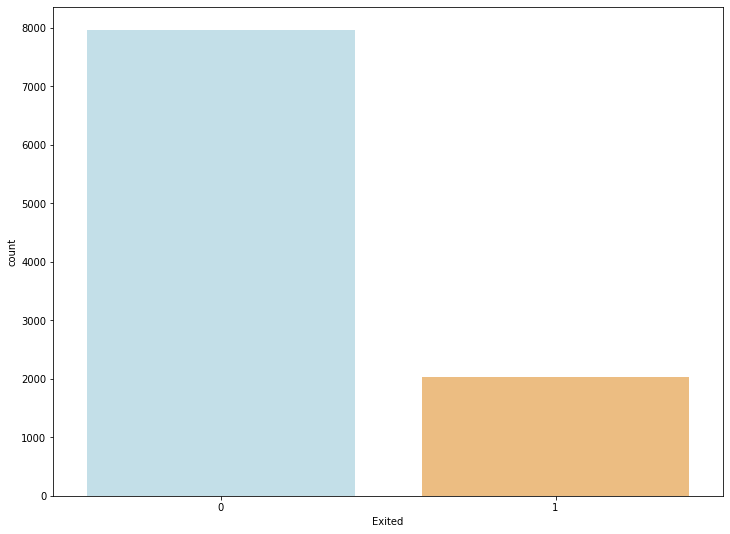

In [ ]:
plt.figure(figsize=(12,9))
sb.countplot(df['Exited'],palette='RdYlBu_r')
plt.show()

# Conclusion:
Customer who have not left the bank are way high then customer who have left the bank.

# Bivariate Analysis.

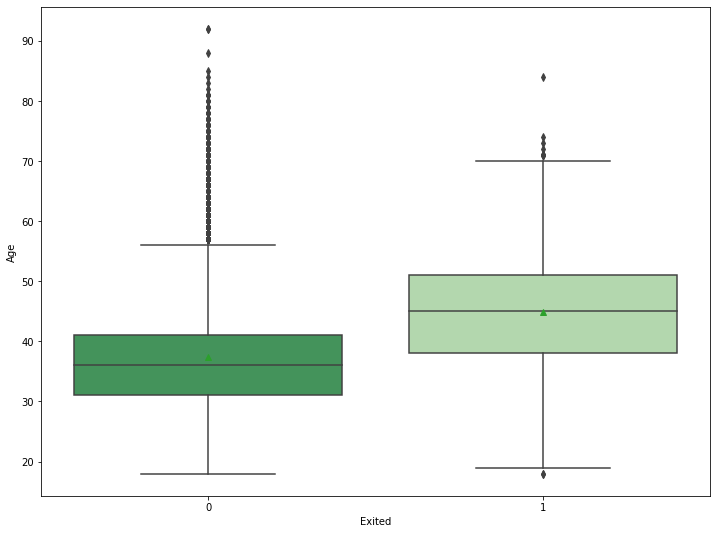

In [ ]:
plt.figure(figsize=(12,9))
sb.boxplot(data=df,x='Exited',y='Age',showmeans=True,palette='Greens_r')
plt.show()

# Conclusion:
Customer who have left the bank have average higher then the customer who have not left the bank so it means age as it was showing high correlation in correlation has impact on customer leaving the bank.

Text(0, 0.5, 'IsActiveMember')

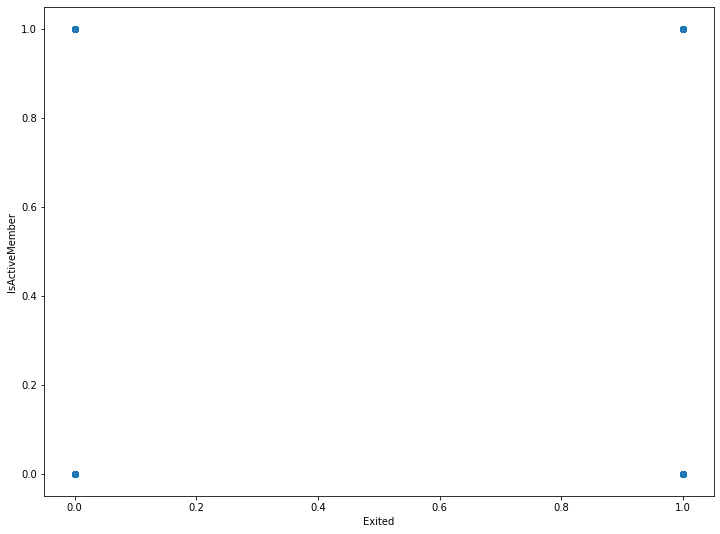

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(df["Exited"],df["IsActiveMember"])
plt.xlabel('Exited')
plt.ylabel('IsActiveMember')

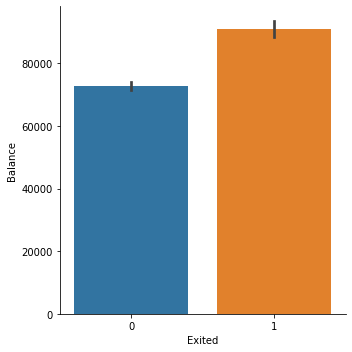

In [ ]:
sb.factorplot(x ='Exited', y ='Balance', data = df, kind ='bar')
plt.show()

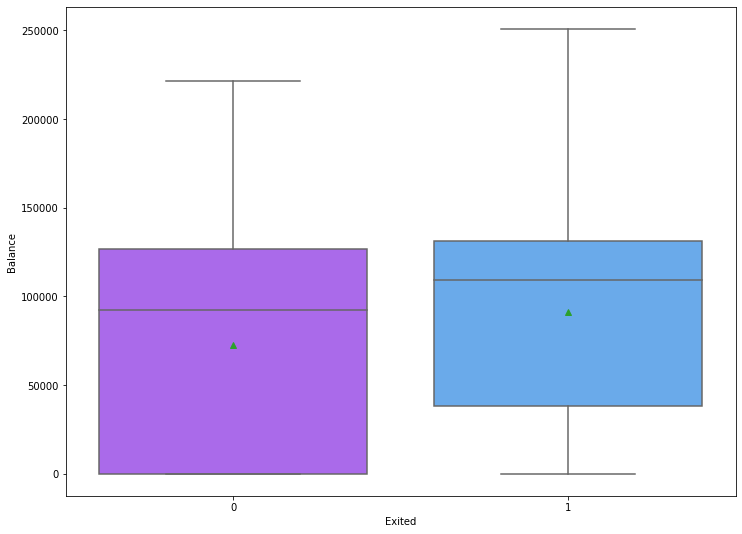

In [ ]:
plt.figure(figsize=(12,9))
sb.boxplot(data=df,x='Exited',y='Balance',showmeans=True,palette='cool_r')
plt.show()

#Conclusion:
 Her from two gragh we can see that the average money kept by the customer who left the bank are more then the customer who have stayed with bank.might be they customer left the bNK  where not satisfied with the interest they were getting for there money.


Text(0.5, 1.0, 'IsActiveMember and Exited')

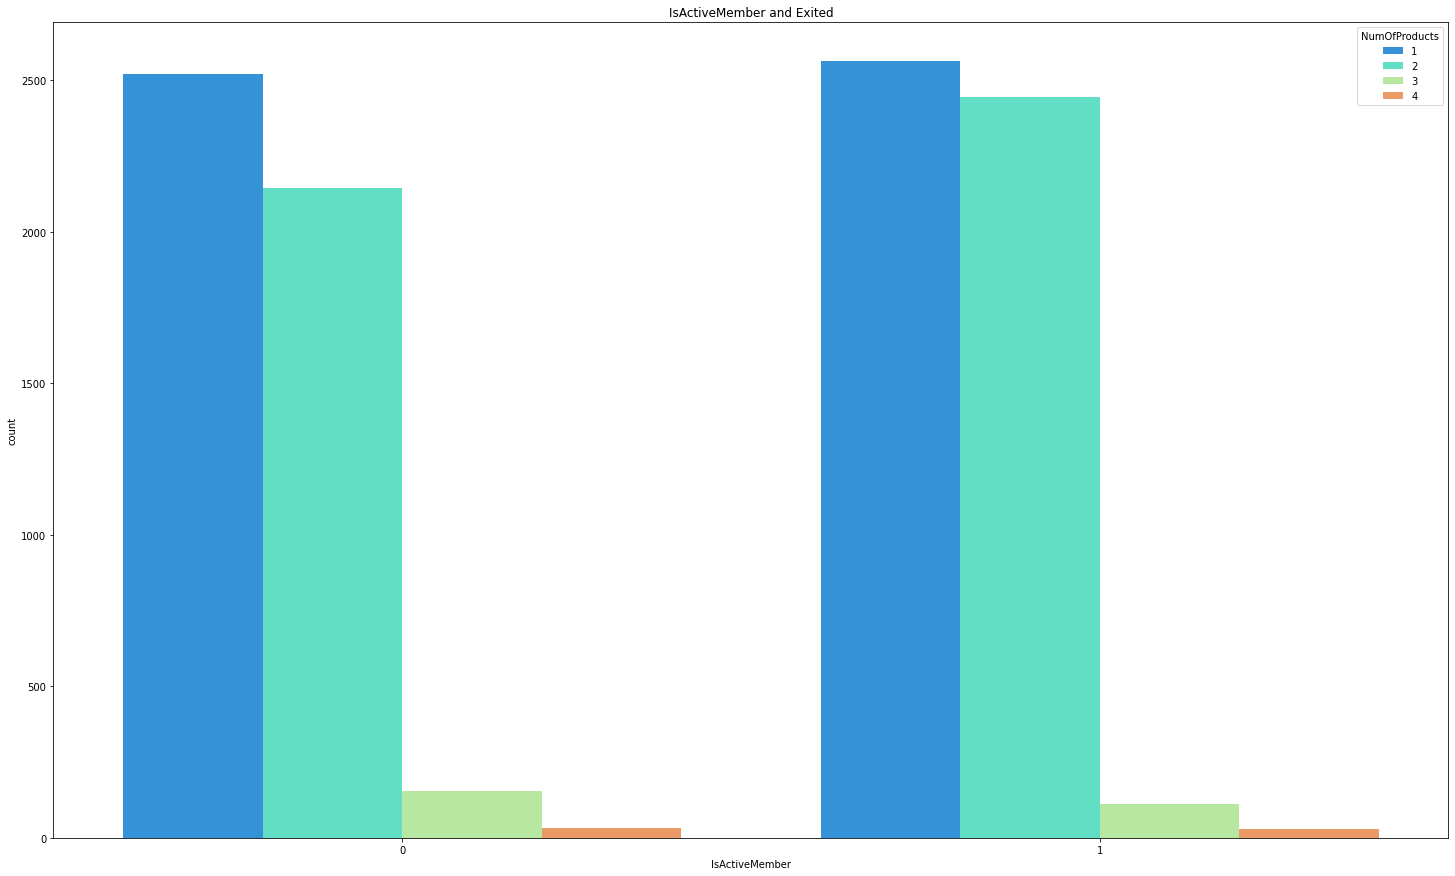

In [ ]:
plt.figure(figsize=(25,15))
sb.countplot(x='IsActiveMember',data=df, palette='rainbow',hue='NumOfProducts')
plt.title("IsActiveMember and Exited")

# Conclusion:
Here we can see that the even the  inactive customer have used the have used more then three compared to active members.

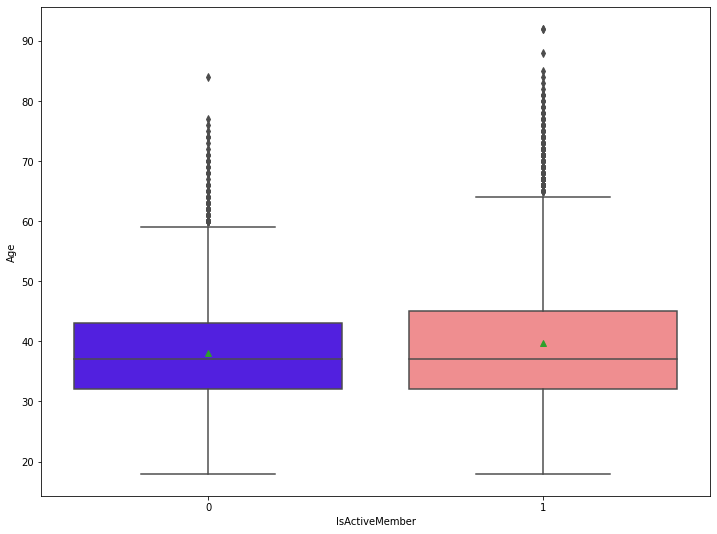

In [ ]:
plt.figure(figsize=(12,9))
sb.boxplot(data=df,x='IsActiveMember',y='Age',showmeans=True,palette='gnuplot2')
plt.show()

# Conclusion:
Average age of active customer is more then in active member age is not factor incase of IsActiveMember

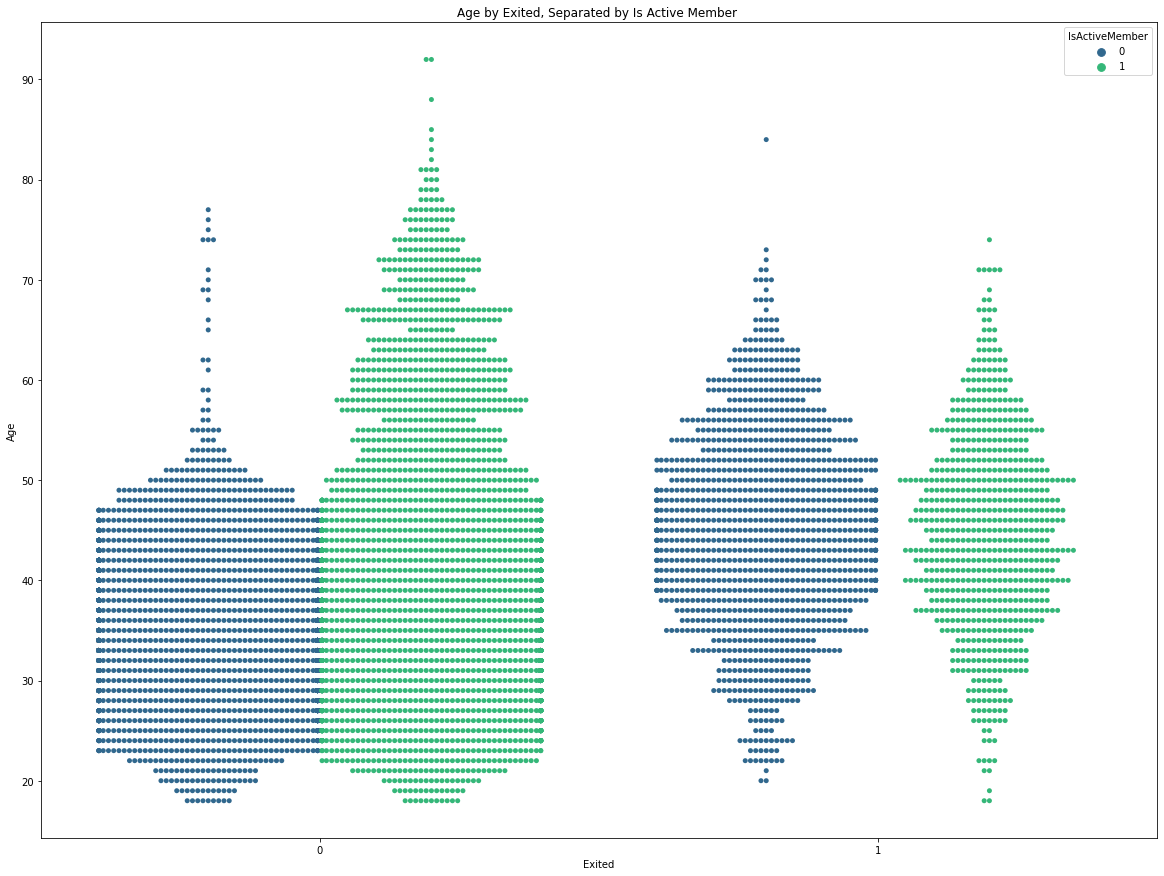

In [ ]:
plt.figure(figsize=(20,15))
sb.swarmplot(x='Exited', y='Age', data=df, hue='IsActiveMember', dodge=True, palette='viridis')
plt.title("Age by Exited, Separated by Is Active Member ")
plt.show()

#Conclusion:
Here we can see that the customer who left the bank had more inactive customers compared to the customer who stayed with the bank.and as checked the average of the people people is also high who left the bank 

#Final Conclusion:
1) The age has to major factor in customer living the bank most of them were beteen age grp 40 to 50 

2) After anaylysing we also can conclude that this people living the bank where mosttly inactive.it means sense ,they did not had interest bank products.

3) The customer who left bank had high bank balance so may be  they were premimum customer and wanted good service from bank.


# Modelling the algorithm
Since it target varable is distinct it is a classification problem so will use classification algorithms.

# Logistical Regression

In [ ]:
scaled_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Surname_encoded,Geography_encoded,Gender_encoded,CustomerId,Exited,HasCrCard,IsActiveMember
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0.380416,0.0,0.0,15634602,1,1,1
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.401569,1.0,0.0,15647311,0,0,1
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0.696008,0.0,0.0,15619304,1,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.098601,0.0,0.0,15701354,0,0,0
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0.621631,1.0,0.0,15737888,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,0.481341,0.682020,0.0,1.0,15606229,0,1,0
9996,0.332,0.229730,1.0,0.228657,0.000000,0.508490,0.455817,0.0,1.0,15569892,0,1,1
9997,0.718,0.243243,0.7,0.000000,0.000000,0.210390,0.535653,0.0,0.0,15584532,1,0,1
9998,0.844,0.324324,0.3,0.299226,0.333333,0.464429,0.800068,0.5,1.0,15682355,1,1,0


# Since the high correlated features where 'Age','IsActiveMember','Balance' so taking for modelling as well for target variable exited.

In [ ]:
X=scaled_df[['Age','IsActiveMember','Balance']]
y=scaled_df['Exited']

# Splitting the Data into 80% training the model and 20 for Testing the model.

In [ ]:
X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Model1=LogisticRegression().fit(X_Train,y_Train)

In [ ]:
Test_accuracy=round(Model1.score(X_Test,y_Test)*100,2)
print('Test accuracy:',Test_accuracy)
Train_accuracy=round(Model1.score(X_Train,y_Train)*100,2)
print('Train accuracy:',Train_accuracy)

Test accuracy: 81.05
Train accuracy: 80.54


In [ ]:
y_pred=Model1.predict(X_Test)
print('y pred:',y_pred)

y pred: [0 0 0 ... 0 0 0]


In [ ]:
Model1.coef_[0]
print('slope of individual features (m):',Model1.coef_[0])


slope of individual features (m): [ 5.10334    -1.05731081  1.20611627]


In [ ]:
Model1.intercept_# one (c)
print('Intercept (c):',Model1.intercept_)

Intercept (c): [-2.84140668]


In [ ]:
Data1=pd.DataFrame()
Data1['Actual y']=y_Test
Data1['predicted y']=y_pred

In [ ]:
Data1

,Actual y,predicted y
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
...,...,...
6412,1,0
8285,0,0
7853,1,0
1095,1,0


# Confusion matrix for Logistic regression.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_Test,y_pred))
tn , fp,fn,tp= confusion_matrix(y_Test,y_pred).ravel()
print('True Postive: ',tp )
print('True negative : ',tn )
print('False postive : ',fp )
print('False negative : ',fn )

[[1570   37]
 [ 342   51]]
True Postive:  51
True negative :  1570
False postive :  37
False negative :  342


#Conclusion:
Positve menas exited =1 (the customer left the bank)

Negative means exited=0 (the customer is with the bank)

Here we can see that 

TP = 51 i.e the algorithm has correctly predicted 45 customer who have actually left the bank .

TN=1570 i.e the algorithm has correctly predicted 1564 customer who have not actually left the bank .

FP= 37 i.e the algorithm has wrongly predicted 43 customer who have not actually left the bank as left the bank .

FN= 342 i.e the algorithm has wrongly predicted 348 customer who have actually left the bank as not left the bank.

 # Recall,F1-score,Accuracy,Precission For Logistic Regression.

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('recall :',recall_score(y_Test,y_pred)) 
print('f1 :',f1_score(y_Test,y_pred))
print('accuracy :',accuracy_score(y_Test,y_pred))
print('precision :',precision_score(y_Test,y_pred))

recall : 0.1297709923664122
f1 : 0.21205821205821204
accuracy : 0.8105
precision : 0.5795454545454546


In [ ]:
X_Test

,Age,IsActiveMember,Balance
6252,0.189189,0,0.385452
4684,0.337838,1,0.000000
1731,0.351351,0,0.000000
4742,0.554054,1,0.474902
4521,0.121622,1,0.498194
...,...,...,...
6412,0.472973,1,0.391668
8285,0.094595,1,0.000000
7853,0.391892,0,0.000000
1095,0.148649,0,0.000000


# ROC_AUC Curve For Logistic Regression

In [ ]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_Test,Model1.predict_proba(X_Test)[:,1])
roc

0.7561170831809307

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.756


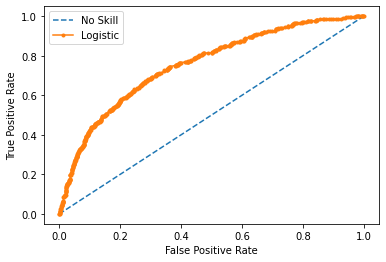

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_Test))]
# predict probabilities
lr_probs = Model1.predict_proba(X_Test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores AREA 
ns_auc = roc_auc_score(y_Test, ns_probs) 
lr_auc = roc_auc_score(y_Test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_Test, ns_probs) # TPR  NO SKILL LINE
lr_fpr, lr_tpr, _ = roc_curve(y_Test, lr_probs) # LOGISTIC LINE 
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Conclusion:
The ROC_AUC value is 0.75 is indicate the model is good.The ROC_AUC value  indicating the quality of the model .


# Naive Bayes Modelling

In [ ]:
X=scaled_df[['Age','IsActiveMember','Balance']]
y=scaled_df['Exited']

In [ ]:
X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB 

In [ ]:
Model2=GaussianNB().fit(X_Train,y_Train)

In [ ]:
GTraining_accuracy=print('Training accuracy',round(Model2.score(X_Train,y_Train),3))
GTesting_accuracy=print('Testing accuracy',round(Model2.score(X_Test,y_Test),3))

Training accuracy 0.804
Testing accuracy 0.804


In [ ]:
y_pred1=Model2.predict(X_Test)

In [ ]:
Data2=pd.DataFrame()
Data2['Actual y']=y_Test
Data2['predicted y']=y_pred1

In [ ]:
Data2

,Actual y,predicted y
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
...,...,...
6412,1,0
8285,0,0
7853,1,0
1095,1,0


# Confusion matrix for Naive Bayes.

In [ ]:
print(confusion_matrix(y_Test,y_pred))
tn , fp,fn,tp= confusion_matrix(y_Test,y_pred1).ravel()
print('True Postive: ',tp )
print('True negative : ',tn )
print('False postive : ',fp )
print('False negative : ',fn )

[[1570   37]
 [ 342   51]]
True Postive:  45
True negative :  1564
False postive :  43
False negative :  348


# Conclusion:
Positve menas exited =1 (the customer left the bank)

Negative means exited=0 (the customer is with the bank)

Here we can see that 
TP = 45 i.e the algorithm has correctly predicted  45  customer who have actually  left the bank .

TN=1564 i.e  the algorithm has correctly predicted  1564  customer who have not actually  left the bank .

FP= 43 i.e the algorithm has wrongly  predicted  43  customer who have not actually  left the bank as  left the bank .

FN= 348 i.e the algorithm has wrongly  predicted  348  customer who have  actually  left the bank as  not left the bank.

 # Recall,F1-score,Accuracy,Precission For Naive Bayes.

In [ ]:
print('recall :',recall_score(y_Test,y_pred1))
print('f1 :',f1_score(y_Test,y_pred1))
print('accuracy :',accuracy_score(y_Test,y_pred1))
print('precision :',precision_score(y_Test,y_pred1))

recall : 0.11450381679389313
f1 : 0.18711018711018712
accuracy : 0.8045
precision : 0.5113636363636364


# ROC_AUC Curve For Naive Bayes.

In [ ]:
roc2=roc_auc_score(y_Test,Model2.predict_proba(X_Test)[:,1])
roc2

0.7631727287265795

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.763


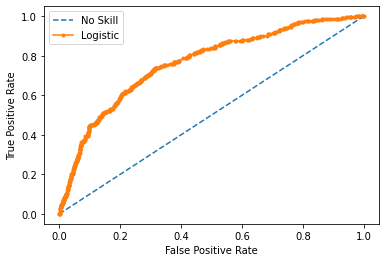

In [ ]:
ns_probs = [0 for _ in range(len(y_Test))]
lr_probs = Model2.predict_proba(X_Test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_Test, ns_probs) 
lr_auc = roc_auc_score(y_Test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_Test, ns_probs) 
lr_fpr, lr_tpr, _ = roc_curve(y_Test, lr_probs)  
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#Conclusion:
The ROC_AUC value is 0.763 is indicate the model is good.The ROC_AUC value indicating the quality of the model .

# Decisian Tree classifier Modelling.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Model3=DecisionTreeClassifier(max_depth=3,random_state=0)
Model3.fit(X_Train,y_Train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
DTraining_accuracy=print('Training accuracy',round(Model3.score(X_Train,y_Train),2))
DTesting_accuracy=print('Testing accuracy',round(Model3.score(X_Test,y_Test),2))

Training accuracy 0.83
Testing accuracy 0.84


In [ ]:
y_pred2=Model3.predict(X_Test)

In [ ]:
Data3=pd.DataFrame()
Data3['Actual y']=y_Test
Data3['predicted y']=y_pred2

In [ ]:
Data3

,Actual y,predicted y
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
...,...,...
6412,1,0
8285,0,0
7853,1,1
1095,1,0


# Confusion matrix for Decisian Tree classifier Modelling.

In [ ]:
print(confusion_matrix(y_Test,y_pred2))
tn , fp,fn,tp= confusion_matrix(y_Test,y_pred2).ravel()
print('True Postive: ',tp )
print('True negative : ',tn )
print('False postive : ',fp )
print('False negative : ',fn )

[[1541   66]
 [ 261  132]]
True Postive:  132
True negative :  1541
False postive :  66
False negative :  261


#Conclusion:
Positve menas exited =1 (the customer left the bank)

Negative means exited=0 (the customer is with the bank)

Here we can see that 

TP = 132 i.e the algorithm has correctly predicted 132 customer who have actually left the bank .

TN=1541 i.e the algorithm has correctly predicted 1541 customer who have not actually left the bank .

FP= 66 i.e the algorithm has wrongly predicted 66 customer who have not actually left the bank as left the bank .

FN= 261 i.e the algorithm has wrongly predicted 261 customer who have actually left the bank as not left the bank.

# Recall,F1-score,Accuracy,Precission For  Decisian Tree classifier Modelling.

In [ ]:
print('recall :',recall_score(y_Test,y_pred2))
print('f1 :',f1_score(y_Test,y_pred2))
print('accuracy :',accuracy_score(y_Test,y_pred2))
print('precision :',precision_score(y_Test,y_pred2))

recall : 0.33587786259541985
f1 : 0.4467005076142132
accuracy : 0.8365
precision : 0.6666666666666666


# ROC_AUC Curve For Decisian Tree classifier Modelling.

In [ ]:
roc3=roc_auc_score(y_Test,Model3.predict_proba(X_Test)[:,1])
roc3

0.7737981572351244

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.774


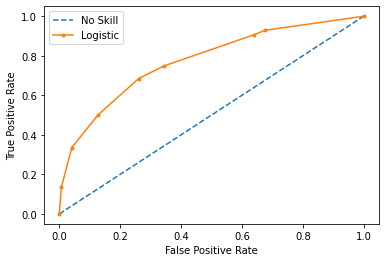

In [ ]:
ns_probs = [0 for _ in range(len(y_Test))]
lr_probs = Model3.predict_proba(X_Test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_Test, ns_probs) 
lr_auc = roc_auc_score(y_Test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_Test, ns_probs) 
lr_fpr, lr_tpr, _ = roc_curve(y_Test, lr_probs)  
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion:
The ROC_AUC value is 0.774 is indicate the model is good.The ROC_AUC value indicating the quality of the model .

In [ ]:
SCORE=pd.DataFrame()

In [ ]:
SCORE['parameters']=['Recall','F1-score','Accuracy','Precision','ROC_AUC value','Train accuracy','Test accuracy']

In [ ]:
SCORE['Logistic Regression']=['0.129','0.212',' 0.810','0.579','0.756','0.805','0.810']
SCORE['Naive Bayees']=['0.114','0.187',' 0.804','0.511','0.763','0.804','0.804']
SCORE['Decissian Tree Classifier']=['0.335','0.446',' 0.836','0.670','0.774','0.830','0.840']





In [ ]:
SCORE

,parameters,Logistic Regression,Naive Bayees,Decissian Tree Classifier
0,Recall,0.129,0.114,0.335
1,F1-score,0.212,0.187,0.446
2,Accuracy,0.810,0.804,0.836
3,Precision,0.579,0.511,0.670
4,ROC_AUC value,0.756,0.763,0.774
5,Train accuracy,0.805,0.804,0.830
6,Test accuracy,0.810,0.804,0.840


# Final Conclusion:
1)We actually cannot only rely on accuracy because the accuracy score gives us the percentage to a model is capable of giving correct prediction it does not gives us where actually the model has gone wrong.

2) That we get by True positive ,True negative,False positive,False Negative.

3) We have to check other parameter and that basis we have to select the best 
model.

4) So from observe the Decision Tree Classifier would be the best model for this data set.